<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/plot_vgg16_layer_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 23rd Feb, 2021
# Myfolder: github/harnalashok/deeplearning/
# Ref:  https://github.com/keras-team/keras/issues/4301
#       https://keras.io/applications/#vgg16
#       https://keras.io/applications/
#
# Objectives:
#	     i) Experimenting with Very Deep ConvNets: VGG16
#     ii) Peeping into layers and plotting extracted-features
#    iii) Visualize filters
#
#  Make tensorflow as backend
#  =========================

#    cp /home/ashok/.keras/keras_tensorflow.json  /home/ashok/.keras/keras.json
#    cat /home/ashok/.keras/keras.json
#    source activate tensorflow
#    ipython
#    OR, on Windows
#    > conda activate tensorflow_env
#    > atom 


## Experiment-1

#### Import libraries

In [77]:
# 1.0 Import libraries
%reset -f

# 1.1 Import VGG16 model from vgg16 module. Other modules are:
#     resnet50, inception_resnet_v2, inception_v3, vgg16, vgg19, xception

from tensorflow.keras.applications.vgg16 import VGG16

# 1.2 With every deep-learning architecture, keras has a function
#     to automatically process image to required dimensions
#      https://docs.w3cub.com/tensorflow~python/tf/keras/applications/resnet50/preprocess_input/

from tensorflow.keras.applications.vgg16 import preprocess_input

# 1.3 Keras image preprocessing. Import image module
#      https://github.com/keras-team/keras/blob/master/keras/preprocessing/image.py
from tensorflow.keras.preprocessing import image

# 1.4
import numpy as np
import pylab

# 1.5 PIL: Python Image library
#     Like jpg, PIL also has another image format

from PIL import Image as im


####Image Processing

In [ ]:
# 2.0 Where is my image?
#img_path = "C:\\Users\\ashok\\Desktop\\chmod\\3. veryDeepConvNets\\cat\\cat.png"
#img_path = '/home/ashok/Images/cat/cat.png'


In [38]:
# 2.1 Next upload the cat image
#     to Colab
# StackOverflow: https://datascience.stackexchange.com/a/29482/64849

from google.colab import files

# 2.2 This command will create a Browse button
#      to browse and select a file from your machine:

uploaded = files.upload()

# 2.3 The file is uploaded to folder: /content:

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  


Saving cat.png to cat.png
User uploaded file "cat.png" with length 74630 bytes


In [78]:
# 2.5 Check for uploaded file
#     In fact this folder, by default,
#     is also your present-working-folder
!ls -la /content
! pwd

total 292
drwxr-xr-x 1 root root   4096 Feb 23 07:18  .
drwxr-xr-x 1 root root   4096 Feb 23 06:24  ..
-rw-r--r-- 1 root root 101413 Feb 23 06:40 'cat11 (1).jpg'
-rw-r--r-- 1 root root 101413 Feb 23 06:35  cat11.jpg
-rw-r--r-- 1 root root  74630 Feb 23 07:18  cat.png
drwxr-xr-x 1 root root   4096 Feb 16 16:35  .config
drwxr-xr-x 1 root root   4096 Feb 16 16:35  sample_data
/content


In [79]:
# 2.6 Display multiple command outputs from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



---------



/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


PIL.Image.Image


---------



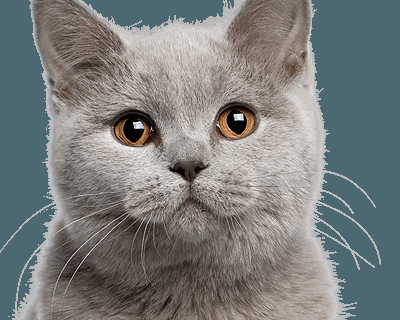

In [81]:
# 3.0 Read image in Python Image Library (PIL) format
#     using keras image module
img_path = "/content/cat.png"
img = image.load_img(img_path)
print("\n---------\n")
# 3.1 Its has a PIL format
type(img)                  # PIL.Image.Image
                           # It is one compressed format for images
						   #  and not an array of pixel intensities

# 3.2 Show image
print("\n---------\n")
img       # Maybe it calls show() method automatically


(400, 320)


---------



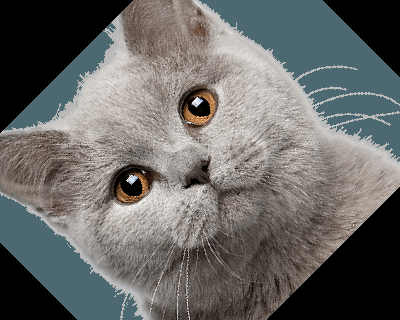


---------



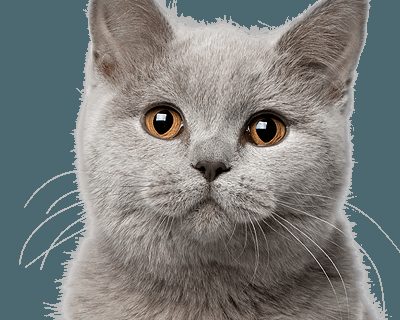


---------



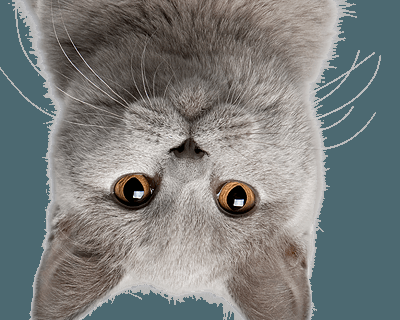


---------



In [83]:
# 3.3 Some examples of image manipulation using PILLOW library
#     Ref: http://pillow.readthedocs.io/en/3.1.x/handbook/tutorial.html
img.size       # (400, 320)
print("\n---------\n")
img.rotate(45)
print("\n---------\n")
img.transpose(im.FLIP_LEFT_RIGHT)
print("\n---------\n")
img.transpose(im.FLIP_TOP_BOTTOM)
print("\n---------\n")

In [90]:
# 3.4 Transform PIL image to numpy array
#     Use image module
x = image.img_to_array(img)
x.shape                              # 320 X 400 X 3
                                     # Last index of 3 is depth

(320, 400, 3)

In [91]:
# 4. For processing an image in VGG16, shape of image should be:
#         [samples, height, width, no_of_channels ]
#    So we need to transfrom the img-dimensions. We can use
#    np.newaxis() as follows:
#    https://stackoverflow.com/a/25755697

x[np.newaxis, :, :, :].shape    # (1, 320, 400, 3)
x[:,np.newaxis,:,:].shape       # (320, 1, 400, 3)
x[:,:,np.newaxis,:].shape       # (320, 400, 1, 3)
x[:,:,:,np.newaxis].shape       # (320, 400, 3, 1)

(1, 320, 400, 3)

(320, 1, 400, 3)

(320, 400, 1, 3)

(320, 400, 3, 1)

In [92]:
# 4.1 We create a Samples axis
x = x[np.newaxis, :, :, :]

In [87]:
# 4.1.1 Other ways to create an axis
x.shape     # (1, 320, 400, 3)
print("\n---------\n")
x.shape + (1,)   # Tuple concatenation  (1, 320, 400, 3, 1)
print("\n---------\n")
(1,) + x.shape   # (1, 1, 320, 400, 3)
print("\n---------\n")

(1, 320, 400, 3)


---------



(1, 320, 400, 3, 1)


---------



(1, 1, 320, 400, 3)


---------



In [48]:
# 4.1.2 OR do it this way
#       reshape to array rank 4
#  x = x.reshape((1,) + x.shape)

In [93]:
# 4.2 About preprocess_input, pl see
#     https://stackoverflow.com/questions/47555829/preprocess-input-method-in-keras
#     Some models use images with values ranging from 0 to 1.
#     Others from -1 to +1. Others use the "caffe" style,
#     that is not normalized, but is centered.
#     The preprocess_input function is meant to adjust your image
#     to the format the model requires.

# 4.2.1
print("\n---------\n")
x.shape
print("\n---------\n")
#x[:1]
print("\n---------\n")

# 4.2.2 Get pixel intensity of a specific pixel
# 136 (pixel intensity)
f"Pixel intensity at x[0,80,90,1] before preprocessing is, {x[0,80,90,1]}"
print("\n---------\n")

# 4.2.3 Normalize image and check pixel intensity
x = preprocess_input(x)     # tensorflow
# 19.22100067138672 (normalized pixel intensity)
f"Pixel intensity at x[0,80,90,1] after preprocessing is, {x[0,80,90,1]}"                
print("\n---------\n")

# 4.2.4
x[0, :2, :2 , :2]           # Have a look at few data-points
print("\n---------\n")
x.shape                     # (1, 320, 400,3) shape remains same



---------



(1, 320, 400, 3)


---------


---------



'Pixel intensity at x[0,80,90,1] before preprocessing is, 136.0'


---------



'Pixel intensity at x[0,80,90,1] after preprocessing is, 19.22100067138672'


---------



array([[[  9.060997, -11.778999],
        [  9.060997, -11.778999]],

       [[  9.060997, -11.778999],
        [  9.060997, -11.778999]]], dtype=float32)


---------



(1, 320, 400, 3)

#### Model Building

In [94]:
###################### BB. Model Building ##########################
# 5.0 Create VGG16 model
#     Use the same weights as in 'imagenet' experiment
#     include_top: F means do not include the 3 fully-connected layers
#     at the top of the network.
#     Model weights are in folder ~/.keras/models
#     OR on Windows on: C:\Users\ashok\.keras\models\
model = VGG16(
	          weights='imagenet',
	          include_top=False
	          )

In [95]:
# 5.1  Get features output from all filters
#      We make predictions considering all layers, ie till model end
#      We have jumped 'model.compile' and 'model.fit' steps
#      Why? Read below.

#### Why no model compilation and fitting?
A model is compiled for setting its configuration such as type of optimizer to use and loss-function to use. 	Given these, it is 'fitted' or 'trained' on the dataset to learn weights.  
But, if weights are already fully learnt, as is the case in this example then there is no need to compile and 'fit' the model. We straightaway move to prediction' using our data so to say as 'test' data.  

In [96]:
# 5.2 Predict features of cat
features = model.predict(x)

# 5.3 So how many features or tiles at the end?
print("\n---------------\n")
features.shape   # (1,10,12,512) Tile size: (10,12)
                 # 1       :no of samples
								 # (10,12) :feature ht and width;
								 # 512     :Depth/number of channels
								 # See below, model summary


---------------



(1, 10, 12, 512)

In [97]:
# 5.4 As Input to model is not specified, 
#     in model.summary(), InputLayer shape
#     is: [(None, None, None, 3)]
#     Number '512' matches with the last layer of model (block5_pool):
model.summary()
	       #  1      =    One batch input,
				 # (10,12) =    filter size
				 #  512    =    No of filters

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
"""
Model Summary examination:
 Let us see how for block1_conv2 (Conv2D), parameters are:  36928
 For block1_conv1 (Conv2D), parameters are: 1792
 Subtract bias for 64 filter layers: 1792 - 64 = 1728
 Per layer weigths are: 1728/3 = 576
 Therefore, weights for 64 layers: 576 X 64 = 36864
 Add to it bias: 36864 + 64 = 36928
"""

#### Display an engineered feature

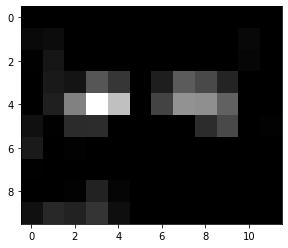

In [98]:
###################### CC. Display a feature ##########################

# 6.0 Display output of a specific feature.  
#     Try 10th tile, 115th tile, 150th tile, 500th tile
#     from (1, 10, 12, 512)

pic=features[0,:,:,500]    # (1,10,12,512) => initial index can only be 0
pylab.imshow(pic)          # Image of 10 X 12 total no of squares/pixels
pylab.gray()               # Gray image
pylab.show()


## Experiment -II

In [ ]:
######################  ################################################  ##########################
#           *************  See Features at some intermediate layer *****************
######################  ################################################  ##########################

#### Objective:
> Extract and display features from any arbitrary intermediate convolution layer in VGG16
For layer names of VGG16, pl see this [link](https://github.com/keras-team/keras/blob/master/keras/applications/vgg16.py)

#### Call libraries

In [99]:
# 1. Call libraries
%reset -f
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# 1.1 For image processing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 1.2 Help create a model uptil some intermediate layer
#     Import 'Model' class
from tensorflow.keras.models import Model

# 1.3 Just for fun and also to learn,
#     let us see how to resize an image
#     when it is in numpy array format
#     We will resize it 224 X 224 X 3
#     as was there in original VGG16
# Install as:
# conda install -c anaconda scikit-image
from skimage.transform import resize

#### Create Base Model

In [100]:
# 2. Create base model
#    include_top = False, abandons the last three FC layers

base_model = VGG16(
	                 weights='imagenet',
	                 include_top=False    # Exclude FC layers
	                 )

#### Dissect base model

In [101]:
# 2.1 What is VGG16 architecture?
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
# 2.2 To see complete model, including FC layers, try following:
#     WARNING: Be warned, there will be fresh download of model
#              weights.
#              Generally FC layers have a very large number of weights
#              Do it only you have sufficient RAM allocated to your VM
# full_model = VGG16(weights='imagenet', include_top=True)
# full_model.summary()


In [103]:
# 2.3 How many layers are there in VGG16
print("\n--------\n")
len(base_model.layers)      # Total layers: 19
                            # You can count layers from model.summary()

# 2.4 Type of container having 'layers' object
print("\n--------\n")
type(base_model.layers)    # List of layers


--------



19


--------



list

In [104]:
# 3.  Access first node ie input layer node
inp = base_model.layers[0]

# 3.1 What is this layer's name
inp.name              # NAME MAY BE DIFFERENT IN EACH CASE.

'input_9'

In [106]:
# 3.2  Access first block-convolution layer node: 'block1_conv1'
#      based on its name. An instance of layer is returned
#
by = base_model.get_layer('block1_conv1')

# 3.3 This returns input to node
print("\n---------\n")  
by.input               # Input tensor to this layer
                       # <tf.Tensor 'input_4:0' shape=(?, ?, ?, 3) dtype=float32>

                         
# 3.4 Output of node
print("\n---------\n") 
by.output 		# by.output is equivalent, internally, to a series
						  #  of nested functions, such as: g(f(h(a.input)))
						  #   where each one of the functions is a layer-function
						  #    In short by.out contains information as to how it has
						  #     been arrived at.
              # <tf.Tensor 'block1_conv1_3/Relu:0' shape=(?, ?, ?, 64) dtype=float32>
						  # shape=(?, ?, ?, 64) =  (samples, img_ht, img_width, channels)



---------



<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_9')>


---------



<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>

#### Develop a revised Model
We create a truncated model

In [107]:
# 4    Instantiate model uptil required node/layer
#      Model extends from 'input' of one node  to 'output'
#      of another node. In our case: block1_conv1
model = Model(inputs=inp.input , outputs= by.output)

# 4.1 Have a look at this intermediate model
model.summary()


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


#### Image Processing

In [108]:
# 5.0 Image processing
#img_path = "C:\\Users\\ashok\\Desktop\\chmod\\3. veryDeepConvNets\\cat\\cat.png"
#img_path = '/home/ashok/Images/cat/cat.png'
img_path = "/content/cat.png"
# 5.1
img = image.load_img(img_path)

# 5.2 Transform to numpy array
x = image.img_to_array(img)
print("\n------\n")
x.shape  
print("\n------\n")  
                            # (320, 400, 3)]
# 5.2.1 Resize cat image
cat_resized = resize(x, (224,224,3))
cat_resized.shape         # (224, 224, 3)
print("\n------\n")

# 5.3 Add to it sample axis
cat_resized = cat_resized[np.newaxis,:,:,:]    # (1,224, 224, 3)

# 5.4 Preprocess the cat
cat_resized = preprocess_input(cat_resized)


------



/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


(320, 400, 3)


------



(224, 224, 3)


------



In [109]:
# 6 Feed 'cat_resized' to input and predict 'output'
#   This is an intermediate (first) layer of vgg16
# 6.1
block1_conv1_features = model.predict(cat_resized)
print("\n------\n")
block1_conv1_features.shape           #  (1, 224, 224, 64)


------



(1, 224, 224, 64)

#### Plotting filters (tiles) designed by CNN

<Figure size 1080x1080 with 0 Axes>

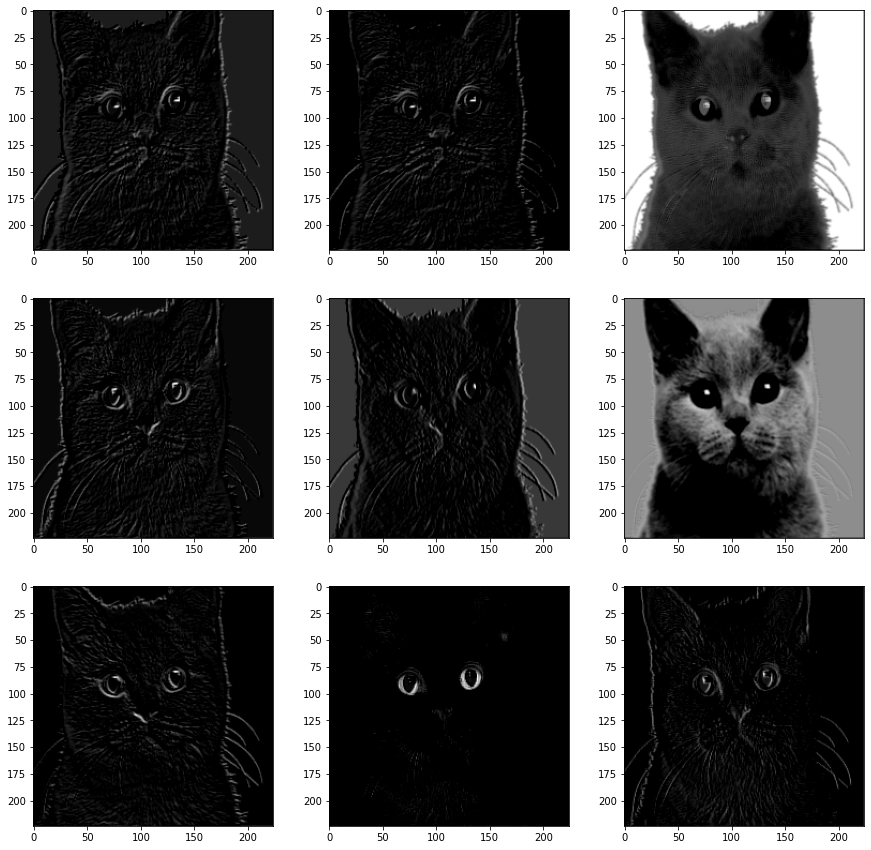

In [110]:
# 6.2 See nine features in various filters
plt.figure(figsize = (15,15))
for i in range(9):
	abc = plt.subplot(3,3, 1 + i)
  # Plot tiles from index 20 (ie 21st) to 28 (ie 29th)
	im = block1_conv1_features [0,:,:,i+20]    
	abc =plt.imshow(im, cmap=plt.get_cmap('gray'))
plt.show()

##########################

## Experiment--III


#### Visualize filter weights
For reference, see [here](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

In [112]:
# 7.0 Get an instance of 'block1_conv1' layer
by = base_model.get_layer('block1_conv1')

In [116]:
# 7.1 Get its filters and biases
filters, biases = by.get_weights()
print(filters.shape)   # (3, 3, 3, 64)

(3, 3, 3, 64)


array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
          -9.43124294e-02, -5.0566

In [117]:
# 7.2 Normalize filter weights
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

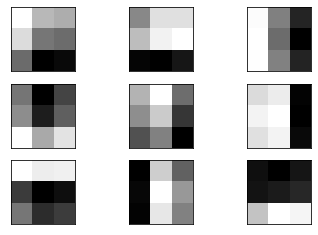

In [127]:
# 7.3 Plot filter weights
abc = plt.figure()
for i in range(9):
  ax = plt.subplot(3,3, 1 + i)
  abc = ax.set_xticks([])
  abc = ax.set_yticks([])
  # Plot filter-weights from index 20 (ie 21st) to 28 (ie 29th)
  im = filters[0,:,:,i+20]    
  abc =plt.imshow(im, cmap=plt.get_cmap('gray'))
plt.show()


In [ ]:
##### I am done ###########